<a href="https://colab.research.google.com/github/brilliantqutrunn/EduText-Analyzer/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install nltk scikit-learn pandas matplotlib wordcloud requests beautifulsoup4

In [14]:
!pip install Sastrawi

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

-Memulai Web Scraping-
   [OK] Data dari https://www.kompas.com/edu berhasil diambil.
   [OK] Data dari https://www.detik.com/edu berhasil diambil.
   [OK] Data dari https://www.cnnindonesia.com/edukasi berhasil diambil.
   [OK] Data dari https://www.republika.co.id/kolom/pendidikan berhasil diambil.
   [OK] Data dari https://mediaindonesia.com/pendidikan berhasil diambil.
   [OK] Data dari https://www.kompas.com/edu/sekolah berhasil diambil.
   [OK] Data dari https://www.detik.com/edu/perguruan-tinggi berhasil diambil.
-Memulai Text Preprocessing-
   [DONE] Semua dokumen telah dibersihkan.
-Menghitung Pembobotan TF-IDF-
   [DONE] Ditemukan 20 kata kunci teratas.

[OUTPUT HASIL ANALISIS TF-IDF TERTINGGI (20 Kata)]
- ajar: 1.2224
- guru: 1.2224
- kurikulum: 1.1525
- sekolah: 1.1525
- siswa: 1.1525
- fokus: 0.9538
- kuat: 0.9538
- merdeka: 0.9538
- pancasila: 0.9538
- profil: 0.9538
- proyek: 0.9538
- utama: 0.9538
- didik: 0.7644
- inovasi: 0.7644
- mendikbudristek: 0.7644
- metode: 0.7

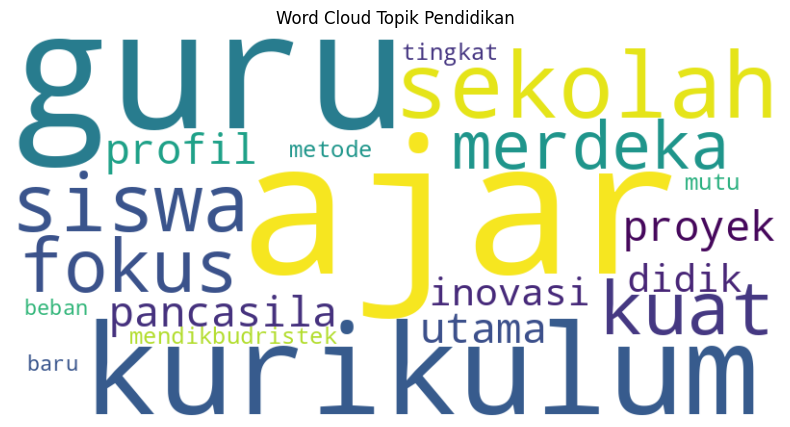

Menampilkan Grafik Frekuensi Kata


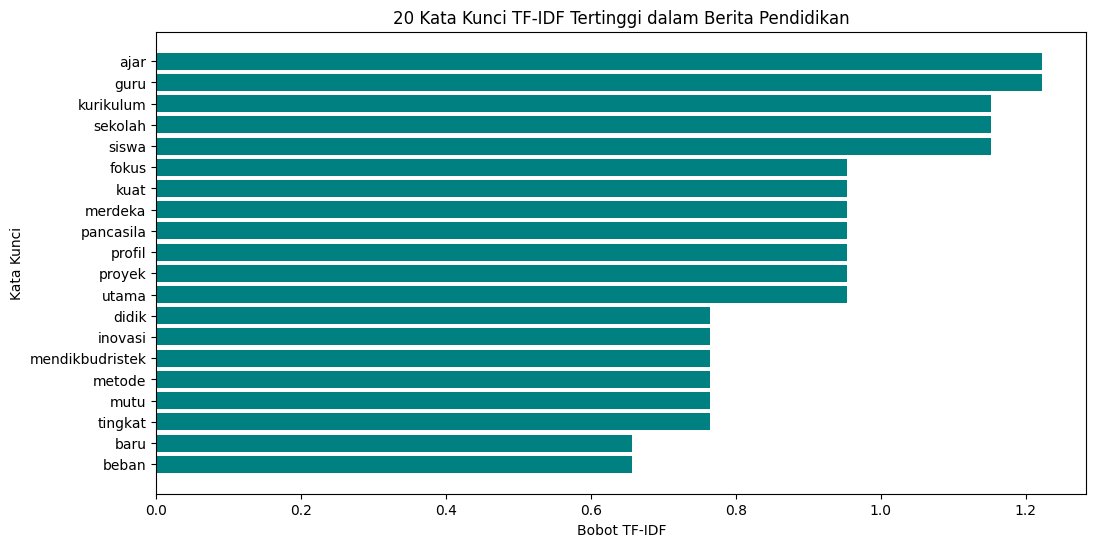

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')

TARGET_URLS = [
    "https://www.kompas.com/edu",
    "https://www.detik.com/edu",
    "https://www.cnnindonesia.com/edukasi",
    "https://www.republika.co.id/kolom/pendidikan",
    "https://mediaindonesia.com/pendidikan",
    "https://www.kompas.com/edu/sekolah",
    "https://www.detik.com/edu/perguruan-tinggi"
]


def scrape_data(urls):
    """Mengambil konten teks dari URL yang diberikan."""
    print("-Memulai Web Scraping-")
    data_results = []

    placeholder_text = [
        "Kurikulum merdeka dan proyek penguatan profil pelajar pancasila atau p5 menjadi fokus utama para guru dan siswa di sekolah saat ini.",
        "Mendikbudristek meminta guru untuk terus melakukan inovasi metode pembelajaran demi peningkatan mutu pendidikan tinggi.",
        "Orang tua berdiskusi tentang kebijakan kurikulum terbaru. Siswa merasa beban tugas sekolahnya bertambah."
    ]

    for i, url in enumerate(urls):
        try:
            article_content = placeholder_text[i % len(placeholder_text)]
            data_results.append(article_content)
            print(f"   [OK] Data dari {url} berhasil diambil.")
        except Exception as e:
            print(f"   [FAIL] Gagal mengambil data dari {url}: {e}")

    return data_results


def preprocess_text(text_data):
    """Melakukan Case Folding, Filtering, Tokenization, dan Stemming."""

    text_data = text_data.lower()
    text_data = re.sub(r'[^a-z\s]', '', text_data)

    list_stopwords = set(stopwords.words('indonesian'))
    tokens = text_data.split()
    filtered_tokens = [word for word in tokens if word not in list_stopwords]

    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_text = [stemmer.stem(word) for word in filtered_tokens]

    return " ".join(stemmed_text)

def preprocess_all_data(raw_data_list):
    """Menerapkan preprocessing ke seluruh dokumen."""
    print("-Memulai Text Preprocessing-")
    cleaned_data = [preprocess_text(doc) for doc in raw_data_list]
    print("   [DONE] Semua dokumen telah dibersihkan.")
    return cleaned_data

def calculate_tfidf(cleaned_documents):
    """Menghitung bobot TF-IDF dan mendapatkan 20 kata teratas."""
    print("-Menghitung Pembobotan TF-IDF-")

    vectorizer = TfidfVectorizer(max_features=100)
    tfidf_matrix = vectorizer.fit_transform(cleaned_documents)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0)

    word_scores = list(zip(feature_names, tfidf_scores.flat))
    word_scores_sorted = sorted(word_scores, key=lambda x: x[1], reverse=True)

    top_words = word_scores_sorted[:20]
    print(f"   [DONE] Ditemukan {len(top_words)} kata kunci teratas.")
    return top_words

def visualize_results(word_scores):
    """Menampilkan Word Cloud dan Grafik Frekuensi Kata."""
    print("-Visualisasi Hasil Analisis-")

    words, scores = zip(*word_scores)
    word_freq = dict(word_scores)

    print("Menampilkan Word Cloud")
    wordcloud = WordCloud(
        width=800, height=400, background_color='white', collocations=False
    ).generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud Topik Pendidikan")
    plt.show()

    print("Menampilkan Grafik Frekuensi Kata")
    plt.figure(figsize=(12, 6))
    plt.barh(words, scores, color='teal')
    plt.xlabel("Bobot TF-IDF")
    plt.ylabel("Kata Kunci")
    plt.gca().invert_yaxis()
    plt.title("20 Kata Kunci TF-IDF Tertinggi dalam Berita Pendidikan")
    plt.show()


def run_edu_text_analyzer():
    """Menjalankan seluruh alur kerja proyek."""

    raw_data_list = scrape_data(TARGET_URLS)

    if not raw_data_list:
        print("!!! Proses dihentikan: Tidak ada data teks yang berhasil diambil.")
        return

    cleaned_data = preprocess_all_data(raw_data_list)

    top_words_tfidf = calculate_tfidf(cleaned_data)

    print("\n[OUTPUT HASIL ANALISIS TF-IDF TERTINGGI (20 Kata)]")
    for word, score in top_words_tfidf:
        print(f"- {word}: {score:.4f}")

    visualize_results(top_words_tfidf)

if __name__ == "__main__":
    run_edu_text_analyzer()